# Surfs Up! Climate Analysis.

### Step 3 - Climate Analysis and Exploration

* Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy create_engine to connect to your sqlite database.

* Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
# matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

### Explore Database.

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [6]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


### Reflect database 

In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
# Base.classes.keys()

In [10]:
# Assign the measurement and station  classes to the variables called `Measurements` and 'Stations'
Measurements = Base.classes.measurement
Stations = Base.classes.station

# Create a session
session = Session(engine)

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x27c3e9e40f0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [12]:
first_row = session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x27c3e9e4a90>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.
* Select only the date and prcp values.
* Load the query results into a Pandas DataFrame and set the index to the date column.
* Plot the results using the DataFrame plot method.
* Use Pandas to print the summary statistics for the precipitation data.

In [13]:
prcp_analysis_df = pd.read_sql(session.query(Measurements.date,Measurements.prcp).\
        filter(Measurements.date.between('2016-08-23', '2017-08-23')).\
        order_by(Measurements.date.asc()).statement, session.bind) 

prcp_analysis_df.set_index('date')

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


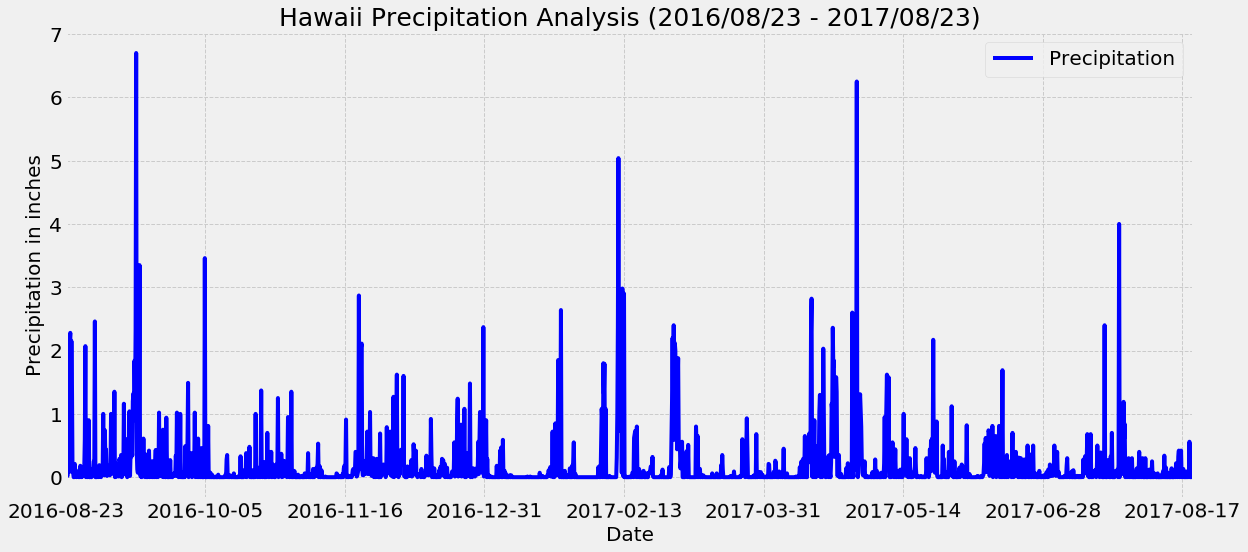

In [14]:
fig = plt.figure()

prcp_analysis_df.plot(x='date', figsize = (18,8), color='blue' )

plt.title("Hawaii Precipitation Analysis (2016/08/23 - 2017/08/23)" , fontsize=25)
plt.ylabel("Precipitation in inches", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.grid(True, ls='dashed')
plt.xticks(rotation=(0.45),size='x-large')
plt.yticks(size='x-large')

# Put a legend below current axis
plt.legend(["Precipitation"],loc="best",prop={'size': 20})

#plt.savefig('output/prcp_analysis.png')
plt.show()

### Station Analysis

1. Design a query to calculate the total number of stations.
2. Design a query to find the most active stations.
    * List the stations and observation counts in descending order.
    * Which station has the highest number of observations?
3. Design a query to retrieve the last 12 months of temperature observation data (tobs).
    * Filter by the station with the highest number of observations.
    * Plot the results as a histogram with bins=12

In [15]:
# Total number of stations
total_num_stations = session.query(Stations.station).count()
print(f"Total number  of stations : {total_num_stations} ")

# The most Active stations.
active_stations = session.query(Measurements.station, Stations.name, func.count(Measurements.tobs)).\
            filter(Measurements.station == Stations.station).\
            group_by(Measurements.station).\
            order_by(func.count(Measurements.tobs).desc()).all()
 
print("\nStations and Observations counts :")
active_stations


Total number  of stations : 9 

Stations and Observations counts :


[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [16]:
# Which station has the highest number of observations?

highest_station = active_stations[0:1]
print(" Station: %s with the highest number of observations: %s" \
      % (highest_station[0][0],highest_station[0][2]))
           

 Station: USC00519281 with the highest number of observations: 2772


In [17]:
# Retrieve the last 12 months of temperature observation data (tobs) for the station with the highest number of observations.

temp12_hgst_station = session.query(Measurements.tobs).\
                      filter(Measurements.station == highest_station[0][0], \
                      Measurements.date.between('2016-08-23', '2017-08-23')).all()
    
temp12_hgst_station_df = pd.DataFrame(temp12_hgst_station, columns=[ 'tobs'])

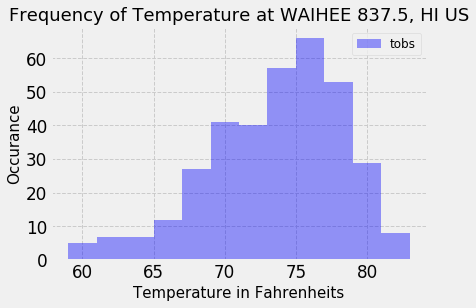

In [18]:
# Plot the results as a histogram with bins=12

fig = plt.figure()

# Control the number of bins
sns.distplot(temp12_hgst_station_df["tobs"], bins=12, color='blue', hist=True, kde=False, rug=False )
# %matplotlib inline
# plt.hist(prcp_analysis_df, bins=12, histtype='stepfilled', facecolor='blue', alpha=0.5)

plt.title(f"Frequency of Temperature at {highest_station[0][1]}", fontsize=18)
plt.grid(True, ls='dashed')
plt.xlabel("Temperature in Fahrenheits",fontsize=15)
plt.ylabel("Occurance", fontsize=15)
plt.legend(["tobs"],loc="best",prop={'size': 12})

plt.xticks(rotation=(0.45),size='large')
plt.yticks(size='large')

#plt.savefig('output/prcp_analysis.png')
plt.show()


### Temperature Analysis

1) Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

2) Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

3) Plot the min, avg, and max temperature from your previous query as a bar chart.

    * Use the average temperature as the bar height.
    * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [19]:
def calc_temps_bystation(start_date, end_date):
    
    sel = [Measurements.station, Measurements.date,
       func.min(Measurements.tobs), 
       func.max(Measurements.tobs), 
       func.avg(Measurements.tobs),
       (func.max(Measurements.tobs) - func.min(Measurements.tobs))]
           
    stmt = session.query(*sel).\
                 filter(Measurements.date.between(start_date, end_date)).\
                 filter(Measurements.station == Stations.station).\
                 group_by(Measurements.station).\
                 order_by(Measurements.date).statement

    return(stmt)


In [20]:
def calc_temps(start_date, end_date):
    
    sel = [ func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs),
       (func.max(Measurements.tobs) - func.min(Measurements.tobs))]
           
    stmt = session.query(*sel).\
                 filter(Measurements.date.between(start_date, end_date)).statement

    return(stmt)


In [21]:
calc_temps_df = pd.read_sql_query(calc_temps('2016-08-23','2017-08-23'), session.bind)
calc_temps_df.head()

,min_1,max_1,avg_1,anon_1
0,58,87,74.494805,29
